# Introduction to PyDicom
__Designer & Developer__ : Mobin Nesari

## Introduction to Dicom
DICOM (Digital Imaging and Communications in Medicine) is a standard format for storing medical imaging data. It includes both image data and metadata, which describe the patient, the study, the imaging settings, and more.

In this notebook, we will learn how to work with DICOM files using the `pydicom` library in Python. This will include reading and inspecting DICOM files, extracting and visualizing image data, and modifying DICOM metadata.

## Setting Up the Environment
First, we need to install the necessary libraries. You can install them using pip:
```sh
!pip install pydicom matplotlib numpy
```

In [ ]:
!pip install pydicom matplotlib numpy

## Importing Required Libraries

In [3]:
import pydicom
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import HTML
from datetime import datetime
import os

## Loading and Inspecting DICOM Files
Let’s start by loading a DICOM file and inspecting its metadata. We’ll use the pydicom library to read the DICOM file and print some of the metadata.

In [4]:
# @markdown Load a DICOM file
dicom_file = "/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401403242.dcm"  # Replace with your DICOM file path
dicom_data = pydicom.dcmread(dicom_file)

### Inspecting DICOM File
Once the DICOM file is loaded, we can inspect its metadata to understand more about the imaging study and the patient. Here’s how to explore the metadata:

In [5]:
print(dicom_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.498.26835736196057756440593597424375587296
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 5.1.1'
(0002, 0016) Source Application Entity Title     AE: 'ACHIVA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_SE', 'M', 'SE']
(0008, 0012) Instance Creation Date              DA: '20240203'
(0008, 0013) Instance Creation Time              TM: '135228'
(0008, 0014) Instance Creator U

In [6]:
# Print all metadata fields
print(dicom_data.dir())

# Access specific metadata fields
print(f"Patient's Name: {dicom_data.PatientName}")
print(f"Study Date: {dicom_data.StudyDate}")
print(f"Modality: {dicom_data.Modality}")
print(f"Series Description: {dicom_data.SeriesDescription}")

['AccessionNumber', 'AcquisitionDate', 'AcquisitionDuration', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', 'AdmittingDiagnosesDescription', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'CodeMeaning', 'CodeValue', 'CodingSchemeDesignator', 'Columns', 'CommentsOnThePerformedProcedureStep', 'ContentDate', 'ContentTime', 'DeidentificationMethodCodeSequence', 'DeviceSerialNumber', 'DiffusionBValue', 'DiffusionGradientOrientation', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FilmConsumptionSequence', 'FlipAngle', 'FrameOfReferenceUID', 'HeartRate', 'HighBit', 'HighRRValue', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceCreatorUID', 'InstanceNumber', 'InstitutionName', 'InstitutionalDepartmentName', 'IntervalsAcquired', 'IntervalsRejected', 'LossyImageCompression', 'LowRRValue', 'MRAcquisitionType', 'MagneticFieldStrength', '

## Extracting and Visualizing Image Data

Next, we’ll extract the pixel data from the DICOM file and visualize it using matplotlib.

### Extract pixel data

In [7]:
pixel_data = dicom_data.pixel_array
print(pixel_data.shape)

(288, 288)


### Display the image

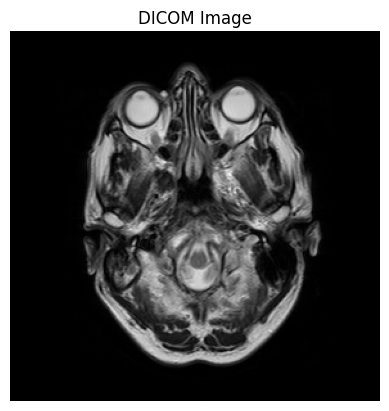

In [7]:
plt.imshow(pixel_data, cmap="gray")
plt.title("DICOM Image")
plt.axis("off")
plt.show()

## Manipulating DICOM Files
We can also modify the metadata in the DICOM file. For example, we might want to change the patient’s name.


### Modifying Patient Name

In [20]:
dicom_data.PatientName = 'John Doe'

### Save the Modified DICOM File

In [21]:
modified_dicom_file = 'modified_dicom_file.dcm'
dicom_data.save_as(modified_dicom_file)

## Advnaced Topic

### Handling Multiple DICOM Files

In [8]:
import os
dicom_dir = '/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234'
dicom_files = [os.path.join(dicom_dir, f) for f in os.listdir(dicom_dir) if f.endswith('.dcm')]
for file in dicom_files:
    ds = pydicom.dcmread(file)
    print(f"Loaded {file}")

Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401407244.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401431252.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401434253.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401410245.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401435254.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234/1.3.46.670589.11.10042.5.0.1412.2024020313401428251.dcm
Loaded /kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.20240

### Anonymizing DICOM Data

In [9]:
fields_to_anonymize = ['PatientName', 'PatientID', 'PatientBirthDate']

for field in fields_to_anonymize:
    if hasattr(dicom_data, field):
        setattr(dicom_data, field, 'Anonymous')

print('DICOM data anonymized')

DICOM data anonymized


/opt/conda/lib/python3.10/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR DA: 'Anonymous'.
  warnings.warn(msg)


### Sorting DICOM Files by Slice Location

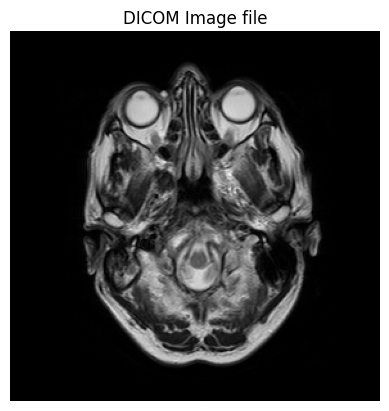

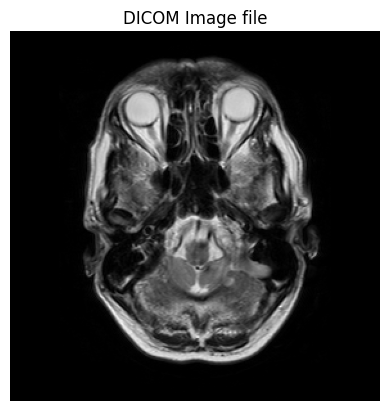

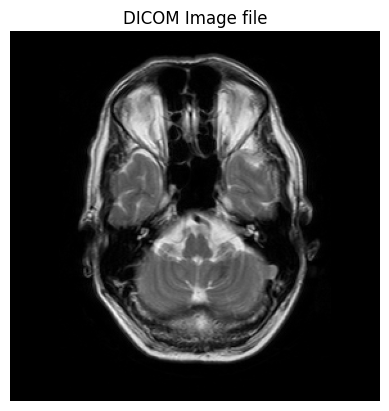

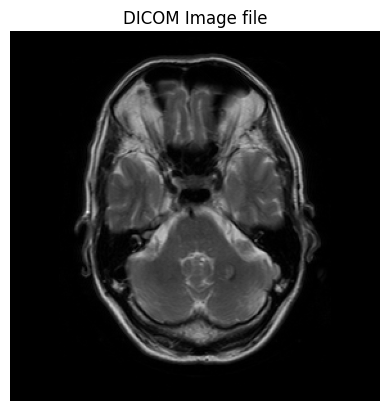

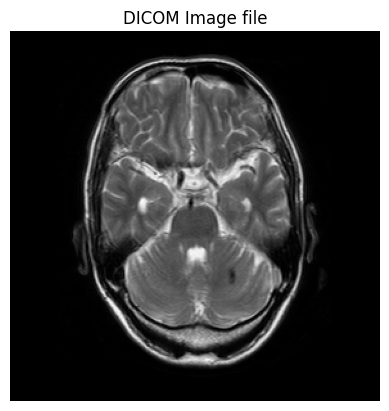

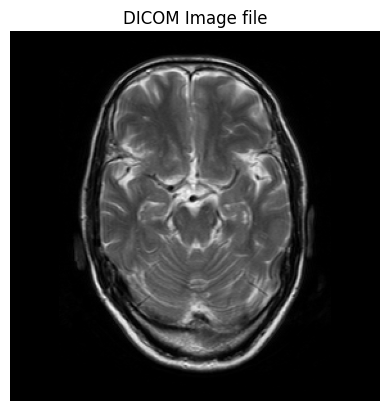

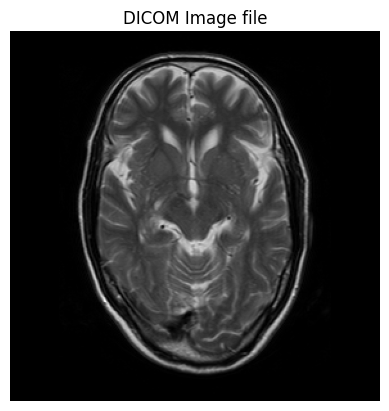

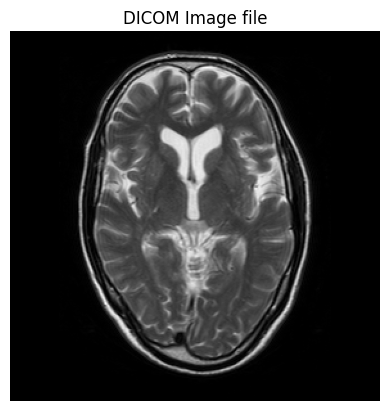

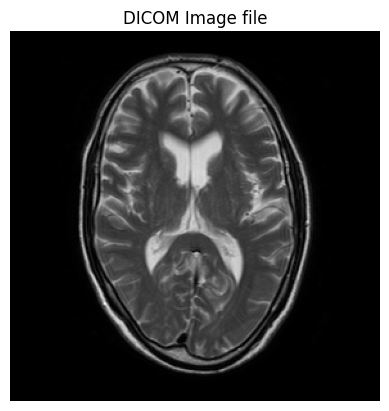

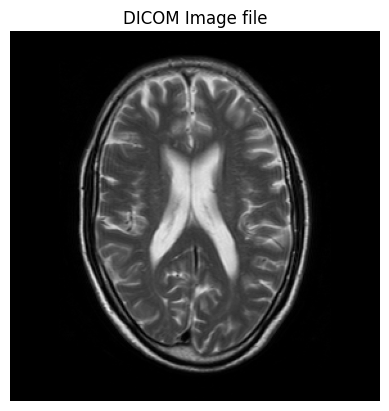

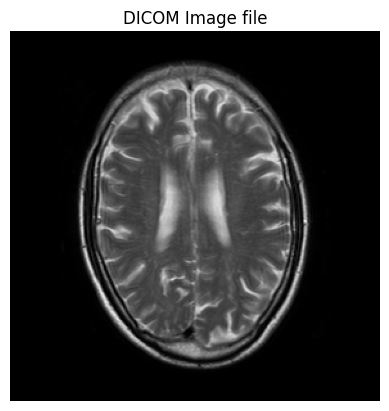

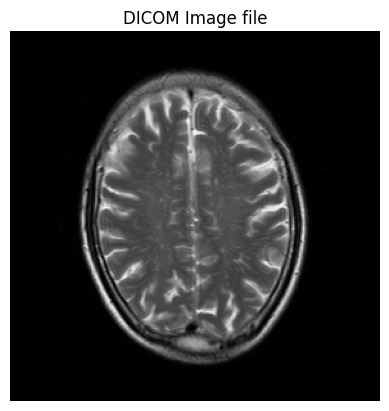

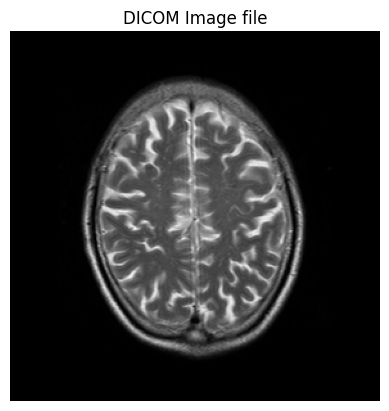

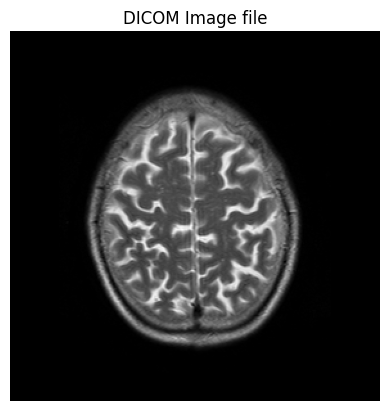

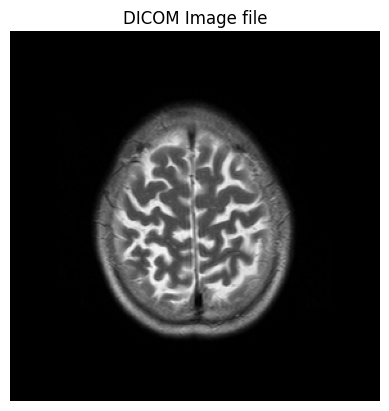

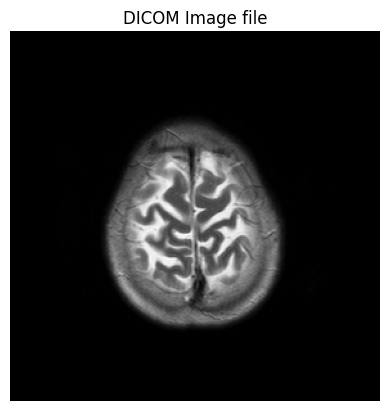

In [11]:
def get_slice_location(dicom_file):
    """
    Extracts the slice location from a DICOM file.
    """
    dicom_data = pydicom.dcmread(dicom_file)
    # Try to get the SliceLocation attribute first, fallback to ImagePositionPatient if unavailable
    try:
        return dicom_data.SliceLocation
    except AttributeError:
        try:
            return dicom_data.ImagePositionPatient[2]  # Assuming axial slices, z-coordinate
        except AttributeError:
            raise ValueError(f"Cannot determine slice location for file: {dicom_file}")

def sort_dicom_files_by_slice_location(directory_path):
    """
    Returns a list of DICOM file paths sorted by slice location.
    """
    dicom_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.dcm')]
    
    dicom_files_with_location = []
    for dicom_file in dicom_files:
        try:
            location = get_slice_location(dicom_file)
            dicom_files_with_location.append((location, dicom_file))
        except ValueError as e:
            print(e)
    
    # Sort the list of tuples by the slice location
    dicom_files_with_location.sort(key=lambda x: x[0])
    
    # Extract the sorted file paths
    sorted_dicom_files = [file for _, file in dicom_files_with_location]
    
    return sorted_dicom_files

# Example usage
directory_path = "/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234"
sorted_files = sort_dicom_files_by_slice_location(directory_path)
for file in sorted_files:
    ds = pydicom.dcmread(file)
    pixel_array = ds.pixel_array
    plt.imshow(pixel_array, cmap="gray")
    plt.title(f"DICOM Image file")
    plt.axis("off")
    plt.show()

### Creating an Animation from DICOM Images

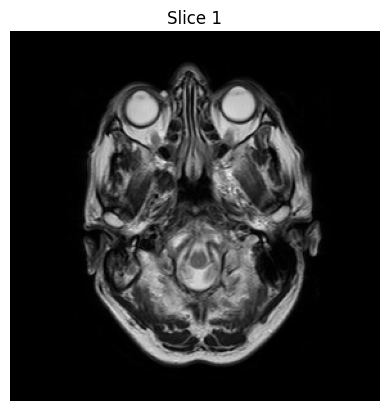

In [12]:
def create_animation_from_dicom(directory_path, output_file='dicom_animation.mp4'):
    sorted_files = sort_dicom_files_by_slice_location(directory_path)
    fig, ax = plt.subplots()
    
    def update(frame):
        dicom_data = pydicom.dcmread(sorted_files[frame])
        ax.clear()
        ax.imshow(dicom_data.pixel_array, cmap='gray')
        ax.set_title(f"Slice {frame + 1}")
        ax.axis('off')
    
    ani = animation.FuncAnimation(fig, update, frames=len(sorted_files), repeat=False)
    return ani

# Example usage
directory_path = '/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020313391873234'
ani = create_animation_from_dicom(directory_path)
HTML(ani.to_jshtml())

## Classifying DICOM Files
Classifying Based on Imaging Sequences

In [13]:
def classify_dicom_files(directory_path):
    # Initialize a dictionary to store file paths for each sequence type
    dicom_dict = {'T1': [], 'T2': [], 'T-Flair': []}
    
    # List all files in the directory
    dicom_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.dcm')]
    
    for dicom_file in dicom_files:
        try:
            # Read the DICOM file
            dicom_data = pydicom.dcmread(dicom_file)
            
            # Check the SeriesDescription, ProtocolName, or SequenceName to classify the sequence type
            if hasattr(dicom_data, 'SeriesDescription'):
                series_description = dicom_data.SeriesDescription.lower()
            elif hasattr(dicom_data, 'ProtocolName'):
                series_description = dicom_data.ProtocolName.lower()
            elif hasattr(dicom_data, 'SequenceName'):
                series_description = dicom_data.SequenceName.lower()
            else:
                continue
            
            # Classify the DICOM file based on the series description
            if 't1' in series_description:
                dicom_dict['T1'].append(dicom_file)

            elif 'flair' in series_description:
                dicom_dict['T-Flair'].append(dicom_file)
            
            elif 't2' in series_description:
                dicom_dict['T2'].append(dicom_file)
            
        
        except Exception as e:
            print(f"Error processing file {dicom_file}: {e}")
    
    return dicom_dict

# Example usage
directory_path = '/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954'  # Replace with the path to your DICOM directory
dicom_dict = classify_dicom_files(directory_path)

print("T1 files:")
for file in dicom_dict['T1']:
    print(file)

print("\nT2 files:")
for file in dicom_dict['T2']:
    print(file)

print("\nT-Flair files:")
for file in dicom_dict['T-Flair']:
    print(file)

T1 files:
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323865994.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323879999.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323875998.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323868995.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323864993.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5.0.1412.2024020409323893004.dcm
/kaggle/input/iaaa-mri-challenge/data/1.3.46.670589.11.10042.5.0.1412.2024020409313745954/1.3.46.670589.11.10042.5

## Practical Exercises (Optional)

### Exercise 1: Load and Inspect a DICOM File

1. Load a DICOM file using `pydicom`.
2. Print out the metadata fields.
3. Display the image.

In [14]:
# Write your answer for Exercise 1 here

### Exercise 2: Visualize DICOM Images
1. Extract the pixel data.
2. Display the image using `matplotlib`.

In [15]:
# Write your answer for Exercise 2 here

### Exercise 3: Modify and Save DICOM Metadata
1. Modify the patient's name in the DICOM file.
2. Save the modified file.
3. Load the modified file and verify the changes.

In [17]:
# Write your answer for Exercise 3 here

## References

- [PyDicom Documents](https://pydicom.github.io/pydicom/stable/)
